<!-- <align style="color:MediumSeaGreen;">Импорт</align> -->
Импорт

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os
import json

<align style="color:red;">Выполнение</align>

In [ ]:

dir_ = "./configurations"
file_ = "c_gas_stat.json"

os.system(f'OMP_NUM_THREADS=12 ./build/main {dir_}/{file_}')

with open(dir_+"/"+file_, 'r') as file:
    data = json.load(file)

Чтение csv и configuration

In [75]:

df = pd.read_csv("data/verle_stat.csv", header=1)

n = int(1e3*data["rep"]*data["t"])
n=int(data["rep"])
n = 1000
DF=[]
for i in range(data["N"]):
    DF.append(df.iloc[(n+2)*i:(n+2)*i + n][:])

DF[-1]

,time,x,y,z
99198,0,8e-05,8e-05,6e-05
99199,1e-07,8.00000000283e-05,7.99999988126e-05,6.00062814102e-05
99200,2e-07,8.00000002289e-05,7.99999904851e-05,6.00099512984e-05
99201,3e-07,8.00000007772e-05,7.99999678289e-05,6.00110086087e-05
99202,4e-07,8.00000018495e-05,7.99999235892e-05,6.00094502341e-05
...,...,...,...,...
100193,9.95e-05,6.15495407693e-06,9.63821979715e-05,1.5394600261e-05
100194,9.96e-05,8.25390146639e-06,1.63401141374e-06,1.12560630541e-05
100195,9.97e-05,1.538284475e-05,1.45097632436e-06,1.19712107837e-05
100196,9.98e-05,1.80322013827e-05,3.97067089341e-06,9.44426924302e-06


Преобразование string к float и отрисока траекторий

In [76]:

def printt(x):
    # plt.figure()
    for i in range(data["N"]):
        DF[i]["time"] = DF[i]["time"].apply(float)
        DF[i][x] = DF[i][x].apply(float)
        # sns.scatterplot(data=DF[i], x="time", y=x, s=10)

printt("x")
printt("y")
printt("z")

Отрисовка энергии

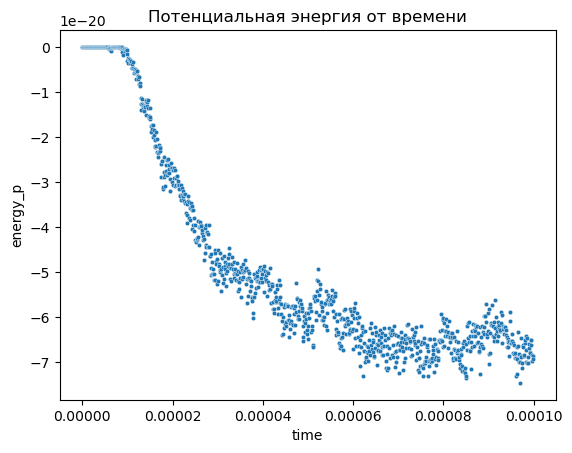

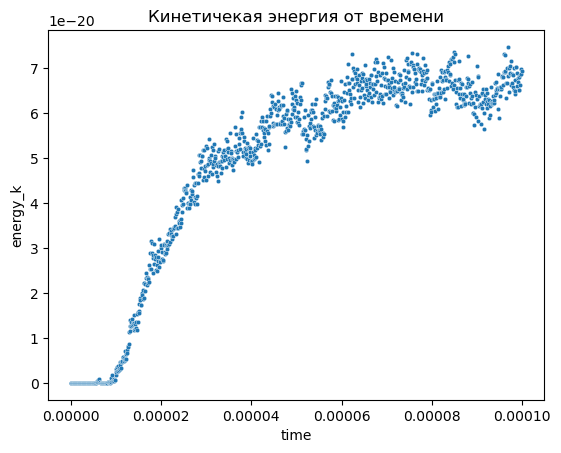

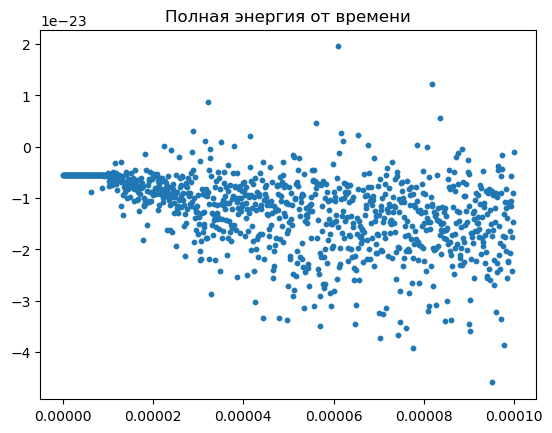

In [62]:

df_en = pd.read_csv("data/energy_stat.csv")
plt.figure()
plt.title("Потенциальная энергия от времени")
sns.scatterplot(data=df_en, x="time", y="energy_p", s=10)
plt.figure()
plt.title("Кинетичекая энергия от времени")
sns.scatterplot(data=df_en, x="time", y="energy_k", s=10)

plt.figure()
plt.title("Полная энергия от времени")
plt.scatter(df_en["time"], df_en["energy_p"]+df_en["energy_k"], s=10)

Отрисовка импульса

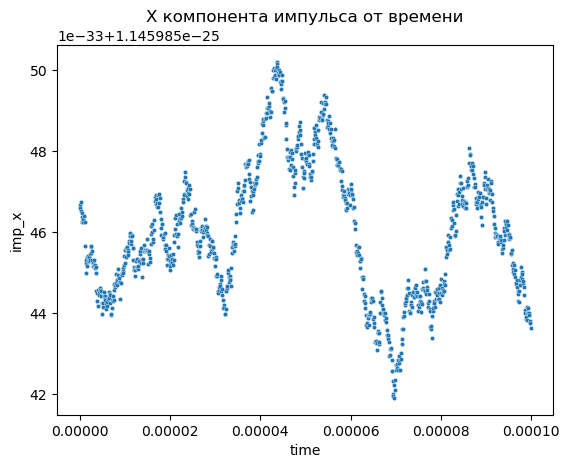

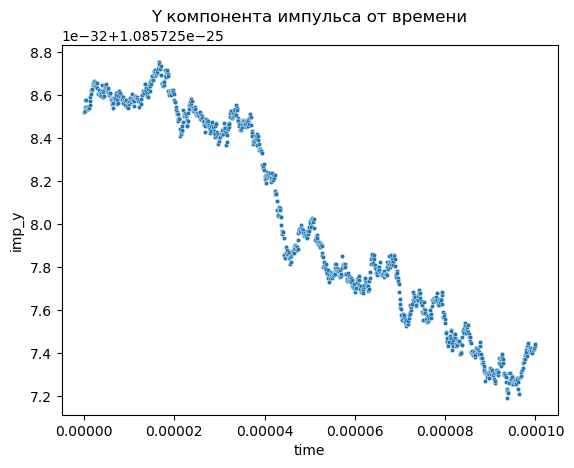

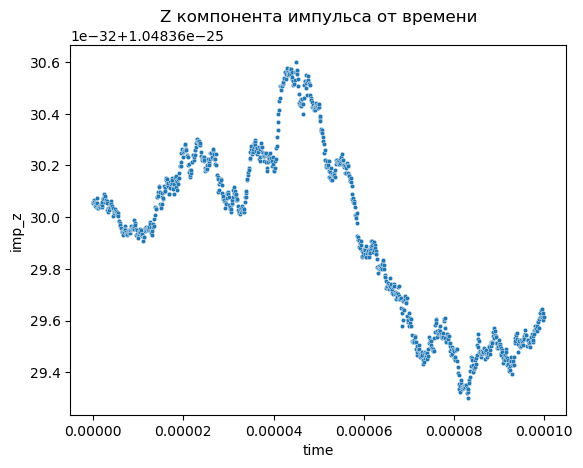

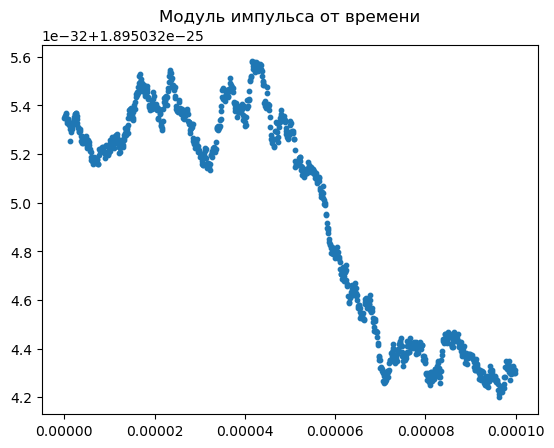

In [63]:
plt.figure()
plt.title("X компонента импульса от времени")
sns.scatterplot(data=df_en, x="time", y="imp_x", s=10)
plt.show()

plt.figure()
plt.title("Y компонента импульса от времени")
sns.scatterplot(data=df_en, x="time", y="imp_y", s=10)
plt.show()

plt.figure()
plt.title("Z компонента импульса от времени")
sns.scatterplot(data=df_en, x="time", y="imp_z", s=10)
plt.show()

plt.figure()
plt.title("Модуль импульса от времени")
plt.scatter(df_en["time"], np.sqrt(df_en["imp_x"]*df_en["imp_x"] + df_en["imp_y"]*df_en["imp_y"] + df_en["imp_z"]*df_en["imp_z"]), s=10)
plt.show()

Распределение по скоростям

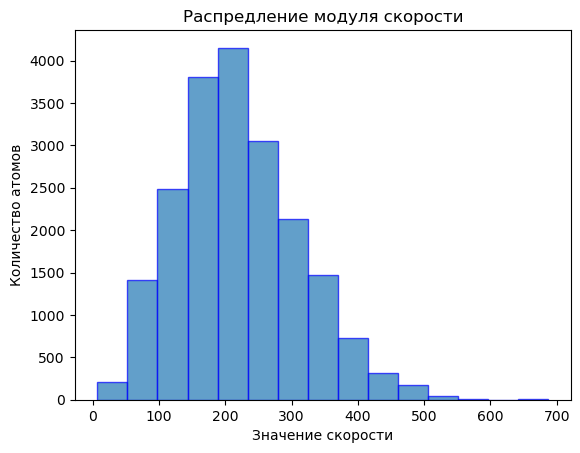

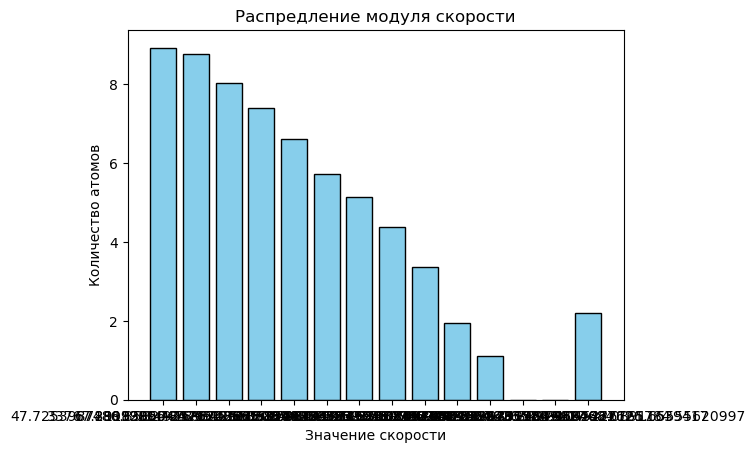

In [64]:

def speeds_linear(frames):
    df_sp = pd.read_csv("data/speeds_stat.csv")
    sp = []
    for t in range(1000-frames, 1000):
        for i in range(data["N"]):
            sp.append(pow(df_sp[f"{i}_x"].to_list()[t],2)+pow(df_sp[f"{i}_y"].to_list()[t],2)+pow(df_sp[f"{i}_z"].to_list()[t],2))
    bins = np.linspace(min(sp), max(sp), int(1 + np.log2(len(sp))))
    plt.figure()
    counts, _ = np.histogram(sp, bins=bins)
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    plt.bar(labels, np.log(counts), color='skyblue', edgecolor='black')
    plt.title("Распредление модуля скорости")
    plt.xlabel("Значение скорости")
    plt.ylabel("Количество атомов")
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


def speeds_hist(frames):
    df_sp = pd.read_csv("data/speeds_stat.csv")
    sp = []
    for t in range(1000-frames, 1000):
        for i in range(data["N"]):
            sp.append(np.sqrt(pow(df_sp[f"{i}_x"][t],2)+pow(df_sp[f"{i}_y"][t],2)+pow(df_sp[f"{i}_z"][t],2)))
    plt.figure()
    bins = int(1 + np.log2(len(sp)))
    plt.hist(sp, bins=bins, edgecolor='blue', alpha=0.7)
    plt.title("Распредление модуля скорости")
    plt.xlabel("Значение скорости")
    plt.ylabel("Количество атомов")
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



speeds_hist(200)
speeds_linear(200)

MSD и коэффицент диффузии

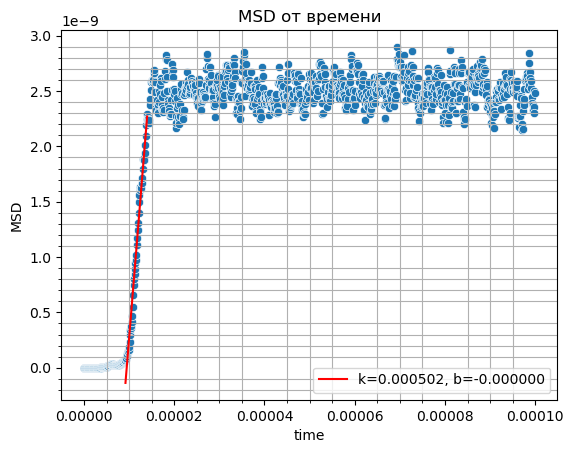

Коэффицент диффузии равен:8.360447119341634e-05


In [77]:

MSD=[0 for i in range(n)]
for at in range(data["N"]):
    xx=DF[at]["x"].to_list()
    yy=DF[at]["y"].to_list()
    zz=DF[at]["z"].to_list()
    for i in range(n):
        MSD[i]+=pow(abs(xx[i]-xx[0]) if abs(xx[i]-xx[0])<data["LENGHT"]/2 else data["LENGHT"]-(abs(xx[i]-xx[0])),2)
        MSD[i]+=pow(abs(yy[i]-yy[0]) if abs(yy[i]-yy[0])<data["LENGHT"]/2 else data["LENGHT"]-(abs(yy[i]-yy[0])),2)
        MSD[i]+=pow(abs(zz[i]-zz[0]) if abs(zz[i]-zz[0])<data["LENGHT"]/2 else data["LENGHT"]-(abs(zz[i]-zz[0])),2)
for i in range(n):
    MSD[i] = MSD[i]/data["N"]
plt.figure()
plt.title("MSD от времени")
plt.ylabel("MSD")
plt.xlabel("time")
plt.minorticks_on()
plt.grid(which="minor")
sns.scatterplot(x=DF[0]["time"].to_list()[::], y=MSD[::])

aa=92
bb=140
p2=np.polyfit(DF[0]["time"].to_list()[aa:bb], MSD[aa:bb], 1)
xx2=np.linspace(DF[0]["time"].to_list()[aa], DF[0]["time"].to_list()[bb], 100)
yy2=np.polyval(p2, xx2)
plt.plot(xx2, yy2, '-r', label=f'k={p2[0]:.6f}, b={p2[1]:.6f}')
plt.legend()
plt.show()
print(f"Коэффицент диффузии равен:{p2[0]/6}")

Длина свободного пробега и эффективного сечения через моделирование

In [66]:

def m_l(l,r):
    return abs(l-r) if abs(l-r)<data["LENGHT"]/2 else data["LENGHT"]-(abs(l-r))

sgm = data["sigm"]
in_coll = [0 for i in range(data["N"])]
coll_num = 0
trace = 0
xx=DF[0]["x"].to_list()
yy=DF[0]["y"].to_list()
zz=DF[0]["z"].to_list()
prev_state = [xx[0], yy[0], zz[0]]

for t in range(1000):
    for i in range(1,int(data["N"])):
        if(pow(m_l(xx[t], DF[i]["x"].to_list()[t]),2)+pow(m_l(yy[t], DF[i]["y"].to_list()[t]),2)+pow(m_l(zz[t], DF[i]["z"].to_list()[t]),2) > pow(2.5*data["sigm"],2)):
            in_coll[i]=0
        else:
            if(in_coll[i]==0):
                in_coll[i]=1
                trace+=pow(xx[t]-prev_state[0],2)+pow(yy[t]-prev_state[1],2)+pow(zz[t]-prev_state[2],2)
                prev_state = [xx[t], yy[t], zz[t]]
                coll_num+=1
            else:
                continue
if(coll_num):
    trace/=coll_num
    print(f"Количество коллизий: {coll_num}")
    print(f"Длина проега{trace}")
    print(f"Коэффицент диффузии: {pow(data["LENGHT"],3)/(data["N"]*trace)}")
else:
    print("Столкновений не было")

Количество коллизий: 403
Длина проега1.121422303588085e-09
Коэффицент диффузии: 8.917247292125509e-06


Длина свободного пробега и эффективного сечения через МКТ

In [67]:

k = 1.380649e-23

df_sp = pd.read_csv("data/speeds.csv")
v_m = 0
for i in range(data["N"]):
    v_m += pow(df_sp[f"{i}_x"].to_list()[-1],2)+pow(df_sp[f"{i}_y"].to_list()[-1],2)+pow(df_sp[f"{i}_z"].to_list()[-1],2)
v_m /= data["N"]
T = (1/3) * (data["mass"]/k) * v_m

# df_en = pd.read_csv("data/energy.csv")
# T = 2/(3*k) * df_en["energy"].to_list()[-1]

smg = np.pi*pow((pow(2,1/6)*data["sigm"]),2)*(1+(data["eps"]/(k*T)))
lmd = pow(data["LENGHT"],3)/(data["N"]*smg)
print(f"Длина свободного пробега равна: {lmd}\nЭффективное сечение равно: {smg}")

Длина свободного пробега равна: 1.5245606700872758e-10
Эффективное сечение равно: 6.559266676758451e-05


Грино-Кубо через корреляцию с начальной скоростью

In [68]:
def min_image(x):
    return x if abs(x)<data["LENGHT"]/2 else -1*x/abs(x)*(data["LENGHT"]-(abs(x)))

corr_func = 0
corr_func_s = 0
for att in range(int(data["N"])):
    xx=DF[att]["x"].to_list()
    yy=DF[att]["y"].to_list()
    zz=DF[att]["z"].to_list()
    for i in range(1, 999):
        corr_func += min_image((xx[i+1]-xx[i-1])) * min_image((xx[2]-xx[0]))/(4*data["t"])
        corr_func += min_image((yy[i+1]-yy[i-1])) * min_image((yy[2]-yy[0]))/(4*data["t"])
        corr_func += min_image((zz[i+1]-zz[i-1])) * min_image((zz[2]-zz[0]))/(4*data["t"])
        
        corr_func_s +=  min_image((xx[2]-xx[0])) * min_image((xx[2]-xx[0]))/(4*data["t"])
        corr_func_s +=  min_image((yy[2]-yy[0])) * min_image((yy[2]-yy[0]))/(4*data["t"])
        corr_func_s +=  min_image((zz[2]-zz[0])) * min_image((zz[2]-zz[0]))/(4*data["t"])

corr_func = corr_func/corr_func_s

integr = 0
for i in range(0, int(data["rep"]-2)):
    integr+=corr_func*data["t"]

print(f"D={integr/3}")

D=-8.0401280262979e-05


Функция радиального распределения

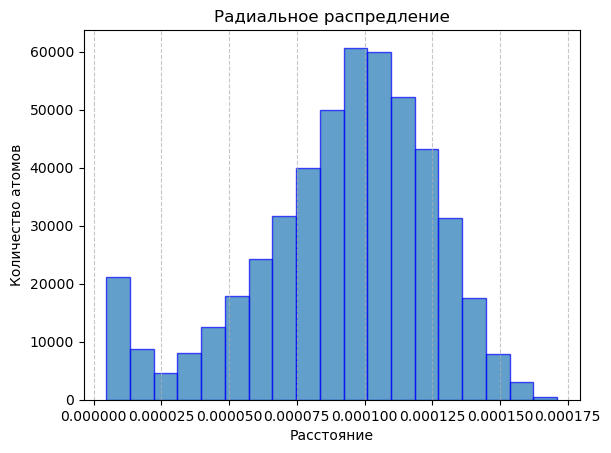

In [79]:

def min_image(x):
    return x if abs(x)<data["LENGHT"]/2 else -1*x/abs(x)*(data["LENGHT"]-(abs(x)))
    
bins = [i*1e-6 for i in range(0, 500)]
sp=[]
for t in range(900,1000):
    for i in range(int(data["N"])):
        xx = DF[i]["x"].to_list()
        yy = DF[i]["y"].to_list()
        zz = DF[i]["z"].to_list()
        for j in range(i+1, int(data["N"])):
            sp.append(2*np.sqrt(pow(min_image(DF[j]["x"].to_list()[t]-xx[t]),2) + pow(min_image(DF[j]["y"].to_list()[t]-yy[t]),2) + pow(min_image(DF[j]["z"].to_list()[t]-zz[t]),2)))


plt.figure()
bins = int(1 + np.log2(len(sp)))
plt.hist(sp, bins=bins, edgecolor='blue', alpha=0.7)
# counts, _ = np.histogram(sp, bins=bins)
# labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
# plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.title("Радиальное распредление")
plt.xlabel("Расстояние")
plt.ylabel("Количество атомов")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Считаем вместе с корреляционной функцией

In [71]:

dir_ = "./configurations"
file_ = "c_gas.json"

os.system(f'OMP_NUM_THREADS=12 ./build/main {dir_}/{file_}')

with open(dir_+"/"+file_, 'r') as file:
    data = json.load(file)


df = pd.read_csv("data/verle.csv", header=1)

n = 1000
DF=[]
for i in range(data["N"]):
    DF.append(df.iloc[(n+2)*i:(n+2)*i + n][:])

DF[-1]





def printt(x):
    # plt.figure()
    for i in range(data["N"]):
        DF[i]["time"] = DF[i]["time"].apply(float)
        DF[i][x] = DF[i][x].apply(float)
        # sns.scatterplot(data=DF[i], x="time", y=x, s=10)

printt("x")
printt("y")
printt("z")

Автокорреляционная функция от времени

<Axes: title={'center': 'Автокорреляционная функция'}, xlabel='time', ylabel='corr_func'>

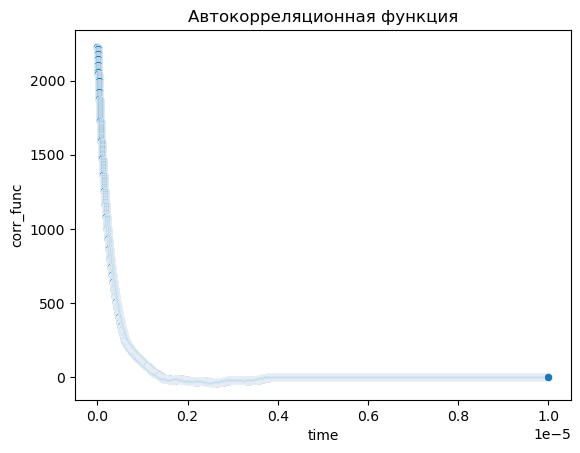

In [72]:

df_corr = pd.read_csv("data/corr_func.csv")

plt.figure()
plt.title("Автокорреляционная функция")
sns.scatterplot(data=df_corr[1:], x="time", y="corr_func")

Грино-Кубо через автокорреляционную функцию

In [73]:

df_corr = pd.read_csv("data/corr_func.csv")

corr = df_corr["corr_func"]
integr=0
for i in range(2, int(data["rep"])-1):
    integr += (corr[i-1]+corr[i])*data["t"]/2

print(f"D={integr/3}")

D=0.0001961261048091022
